# Task  2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape

(25, 2)

In [15]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing Data:

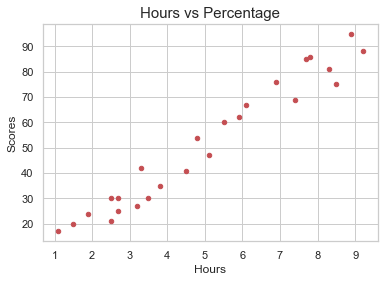

In [110]:
# Plotting the distribution of scores
data.plot(kind='scatter',x='Hours',y='Scores',color='r')
plt.title('Hours vs Percentage',fontsize = '15')
plt.show()

<AxesSubplot:ylabel='Hours'>

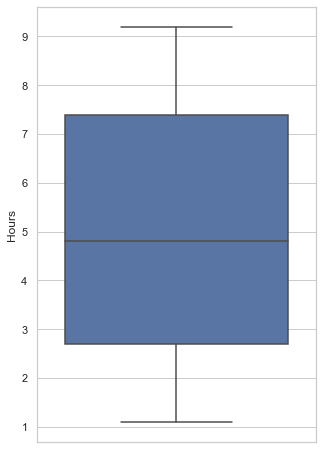

In [111]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Hours',data=data)

<AxesSubplot:ylabel='Scores'>

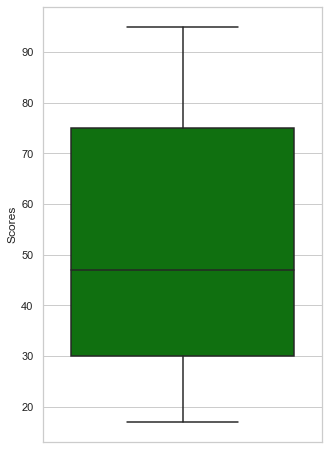

In [112]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Scores',data=data,color="green")

# Preparing the data:

In [113]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [114]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [115]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [117]:
print('The Shape of X_train:',X_train.shape)
print('The Shape of X_test:',X_test.shape)
print('The Shape of y_train:',y_train.shape)
print('The Shape of y_test:',y_test.shape)

The Shape of X_train: (20, 1)
The Shape of X_test: (5, 1)
The Shape of y_train: (20,)
The Shape of y_test: (5,)


# Training the Algorithm:

In [118]:
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [119]:
print('The Coefficient of the regression line',model.coef_)
print('The Intercept of the regression line',model.intercept_)

The Coefficient of the regression line [9.91065648]
The Intercept of the regression line 2.0181600414346974


In [120]:
y_pred = model.predict([[9.25]])

In [121]:
y_pred

array([93.69173249])

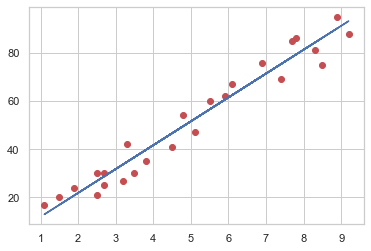

In [122]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,color='r')
plt.plot(X, line);
plt.show()

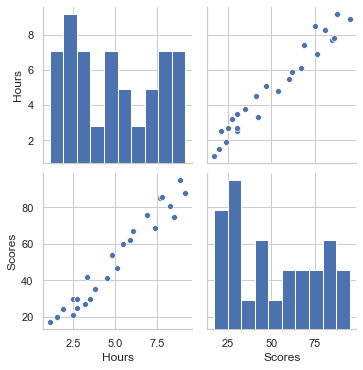

In [123]:
sns.set(style='whitegrid')
sns.pairplot(data)

# Making Prediction:

In [124]:
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [125]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual Vs Predicted Score

In [126]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

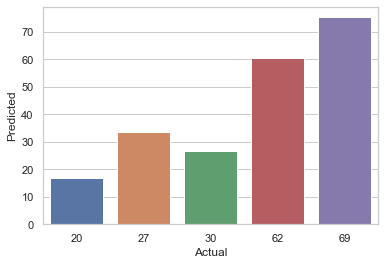

In [127]:
sns.barplot('Actual','Predicted',data=df)

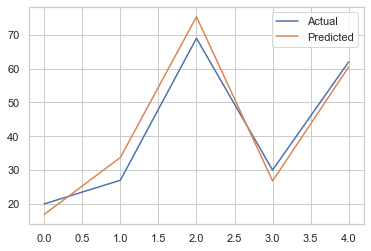

In [128]:
df.plot(kind='line',label='Actual')
plt.legend()

<AxesSubplot:>

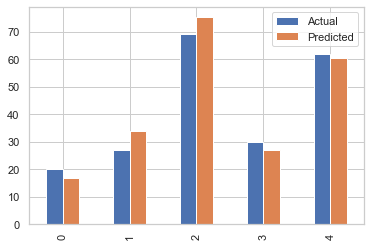

In [129]:
df.plot(kind='bar',label='Actual')

# Test using own data:

In [130]:
hours = ([[9.25]])
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


# Evaluating the model:

In [131]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Root MeanSquared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Root MeanSquared Error: 4.647447612100367
